# Statement :-

There is an ever increase in focus of effective requirement. An organization invest a lot of time and resources in search of potential candidates. The investment become loses is the selected candidate do not join organization in the end.

#### Dataset :-

Dataset is named as “HR_Data”, It consists of 18 columns and 8998 rows in the
dataset

#### Task :-

To make a model that can be used by the recruiters to understand and predict the chances of candidate of joining the organization.


# Solution :-

# Importing the data set

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
hire_df=pd.read_csv("HR_Data.csv")

In [4]:
hire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8998 non-null   int64  
 1   Candidate.Ref                8998 non-null   int64  
 2   DOJ.Extended                 8998 non-null   object 
 3   Duration.to.accept.offer     8998 non-null   int64  
 4   Notice.period                8998 non-null   int64  
 5   Offered.band                 8998 non-null   object 
 6   Pecent.hike.expected.in.CTC  8998 non-null   float64
 7   Percent.hike.offered.in.CTC  8998 non-null   float64
 8   Percent.difference.CTC       8998 non-null   float64
 9   Joining.Bonus                8998 non-null   object 
 10  Candidate.relocate.actual    8998 non-null   object 
 11  Gender                       8998 non-null   object 
 12  Candidate.Source             8998 non-null   object 
 13  Rex.in.Yrs        

In [5]:
hire_df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [6]:
hire_df.shape

(8998, 18)

# Exploratory Data Analysis

In [7]:
hire_df.isna().sum().sum() #missing values in the data set

0

In [8]:
hire_df.columns

Index(['SLNO', 'Candidate.Ref', 'DOJ.Extended', 'Duration.to.accept.offer',
       'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC',
       'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [9]:
hire_df.Status.value_counts()

Joined        7316
Not Joined    1682
Name: Status, dtype: int64

##### checking binary data columns

In [10]:
columns = hire_df.columns
binary_cols = []

for col in columns:
    if hire_df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [11]:
binary_cols

['DOJ.Extended',
 'Joining.Bonus',
 'Candidate.relocate.actual',
 'Gender',
 'Status']

In [12]:
hire_df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


c:\users\nikhil kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\nikhil kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\nikhil kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an expli

<AxesSubplot:xlabel='Gender', ylabel='count'>

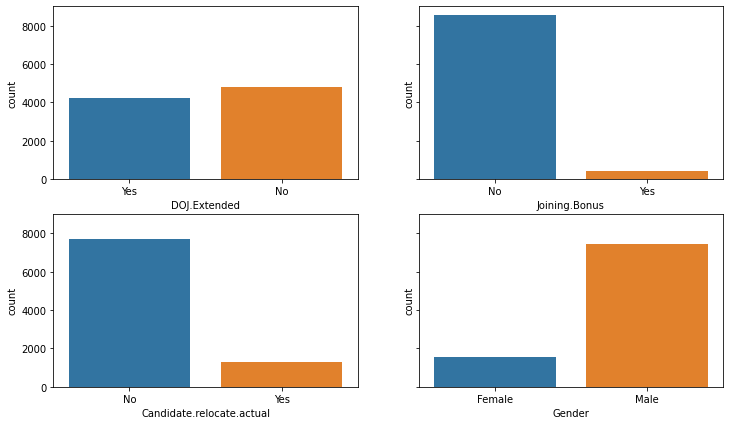

In [13]:
#class distribution of binary features.

fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)

sns.countplot("DOJ.Extended", data=hire_df, ax=axes[0,0])
sns.countplot("Joining.Bonus", data=hire_df, ax=axes[0,1])
sns.countplot("Candidate.relocate.actual", data=hire_df, ax=axes[1,0])
sns.countplot("Gender", data=hire_df, ax=axes[1,1])

In [14]:
#checking the relation of joining bonus , candidate relocate and gender with joining status

#first we change the values of status from 'yes'/'no'  to 0/1

num = {'Joined':1, 'Not Joined':0}
hire_df.Status.replace(num, inplace=True)
hire_df["Status"]=pd.to_numeric(hire_df["Status"], downcast="integer")

In [15]:
hire_df[['Gender','Status']].groupby(['Gender']).mean()

,Status
Gender,
Female,0.823985
Male,0.810796


In [16]:
hire_df[['Joining.Bonus','Status']].groupby(['Joining.Bonus']).mean()

,Status
Joining.Bonus,
No,0.813425
Yes,0.805755


In [17]:
hire_df[['Candidate.relocate.actual','Status']].groupby(['Candidate.relocate.actual']).mean()

,Status
Candidate.relocate.actual,
No,0.781785
Yes,1.000000


Except for Candidate.relocate.actual no other feature has significant effect on Joining status so we will only include Candidate.relocate.actual feature in model of all the binary data features

Checking the effect of other features on the target

##### Checking non-binary data columns

c:\users\nikhil kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\nikhil kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\nikhil kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an expli

<AxesSubplot:xlabel='Location', ylabel='count'>

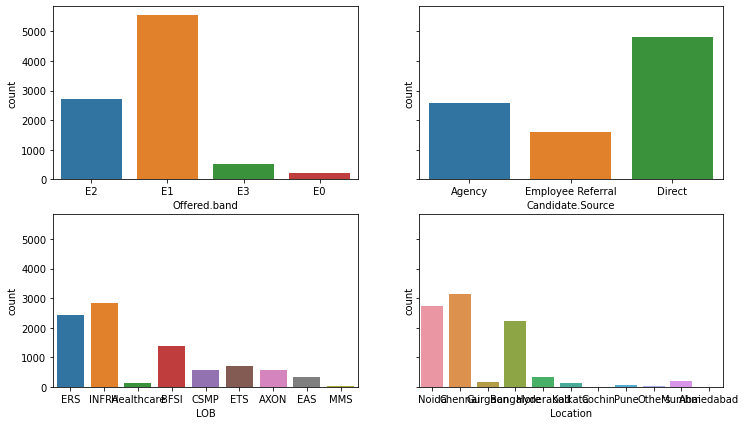

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)

sns.countplot("Offered.band", data=hire_df, ax=axes[0,0])
sns.countplot("Candidate.Source", data=hire_df, ax=axes[0,1])
sns.countplot("LOB", data=hire_df, ax=axes[1,0])
sns.countplot("Location", data=hire_df, ax=axes[1,1])

In [19]:
hire_df[['Offered.band','Status']].groupby(['Offered.band']).mean()

,Status
Offered.band,
E0,0.763033
E1,0.813106
E2,0.809735
E3,0.851485


In [20]:
hire_df[['Candidate.Source','Status']].groupby(['Candidate.Source']).mean()

,Status
Candidate.Source,
Agency,0.758221
Direct,0.820112
Employee Referral,0.880124


The offered.band and candidate.Source features are important for the model because of the high rate of joining of E3 candidates and referral candidates

In [21]:
hire_df[['LOB','Status']].groupby(['LOB']).mean()

,Status
LOB,
AXON,0.774648
BFSI,0.758596
CSMP,0.815199
EAS,0.734104
ERS,0.781211
ETS,0.831169
Healthcare,0.822581
INFRA,0.877895
MMS,1.000000


In [22]:
hire_df.LOB.value_counts()

INFRA         2850
ERS           2427
BFSI          1396
ETS            693
CSMP           579
AXON           568
EAS            346
Healthcare     124
MMS             15
Name: LOB, dtype: int64

In [23]:
hire_df[['Location','Status']].groupby(['Location']).mean()

,Status
Location,
Ahmedabad,0.833333
Bangalore,0.781264
Chennai,0.789273
Cochin,0.875000
Gurgaon,0.808219
Hyderabad,0.780059
Kolkata,0.775194
Mumbai,0.893401
Noida,0.866202


I won't use location for training the model 

##### Checking continous variables

The important continous variables to check are :-
Duration.to.accept.offer , Notice.period , Percent.hike.offered.in.CTC , Percent.difference.CTC , Rex.in.Yrs and Age .

c:\users\nikhil kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\nikhil kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\nikhil kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

<AxesSubplot:xlabel='Age', ylabel='Density'>

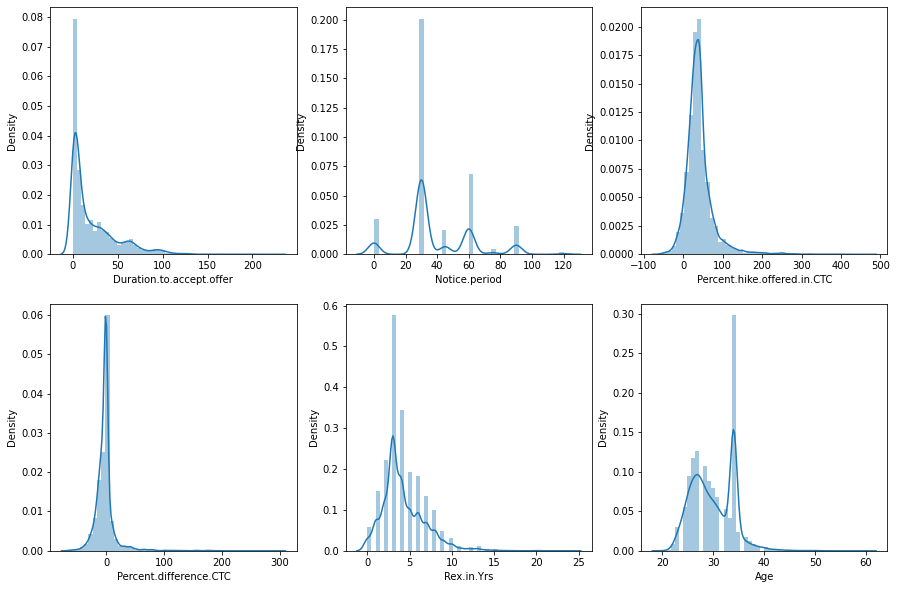

In [24]:
fig, axes = plt.subplots(2,3, figsize=(15, 10))

sns.distplot(hire_df["Duration.to.accept.offer"], ax=axes[0,0])
sns.distplot(hire_df["Notice.period"], ax=axes[0,1])
sns.distplot(hire_df["Percent.hike.offered.in.CTC"], ax=axes[0,2])
sns.distplot(hire_df["Percent.difference.CTC"], ax=axes[1,0])
sns.distplot(hire_df["Rex.in.Yrs"], ax=axes[1,1])
sns.distplot(hire_df["Age"], ax=axes[1,2])


In [25]:
hire_df[['Percent.hike.offered.in.CTC','Percent.difference.CTC','Status']].groupby('Status').mean()

,Percent.hike.offered.in.CTC,Percent.difference.CTC
Status,,
0,38.588460,-2.929298
1,41.147158,-1.263402


The Percent.difference.CTC is important to consider for the model and we can leave the Percent.hike.offered.in.CTC

In [26]:
hire_df[['Duration.to.accept.offer','Notice.period',"Rex.in.Yrs","Age",'Status']].groupby('Status').mean()

,Duration.to.accept.offer,Notice.period,Rex.in.Yrs,Age
Status,,,,
0,24.956599,48.192628,4.439358,29.517836
1,20.617687,37.233461,4.193002,30.004647


and also the Duration.to.accept.offer and Notice.period columns seems to be effecting the status column data so we will include these two featues too

#### Dropping irrelevent features of the dataframe

After analizing all the different types of variables i have decided to drop the following columns :-
'SLNO', 'Candidate.Ref', 'DOJ.Extended','Joining.Bonus','Gender','Rex.in.Yrs',  'Location', 'Age'

In [27]:
hire_df.drop(['SLNO', 'Candidate.Ref', 'DOJ.Extended', 'Joining.Bonus','Gender', 'Rex.in.Yrs', 'Location', 'Age'], axis=1, inplace=True)

In [28]:
hire_df.head()

,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Candidate.relocate.actual,Candidate.Source,LOB,Status
0,14,30,E2,-20.79,13.16,42.86,No,Agency,ERS,1
1,18,30,E2,50.00,320.00,180.00,No,Employee Referral,INFRA,1
2,3,45,E2,42.84,42.84,0.00,No,Agency,INFRA,1
3,26,30,E2,42.84,42.84,0.00,No,Employee Referral,INFRA,1
4,1,120,E2,42.59,42.59,0.00,Yes,Employee Referral,INFRA,1


# Data Preprocessing 

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [30]:
cat_feat=['Candidate.relocate.actual','Offered.band','Candidate.Source','LOB']
X = pd.get_dummies(hire_df, columns=cat_feat, drop_first=True)

In [31]:
sc = MinMaxScaler()
a = sc.fit_transform(hire_df[['Duration.to.accept.offer']])
b = sc.fit_transform(hire_df[['Notice.period']])
c = sc.fit_transform(hire_df[['Pecent.hike.expected.in.CTC']])
d = sc.fit_transform(hire_df[['Percent.hike.offered.in.CTC']])
e = sc.fit_transform(hire_df[['Percent.difference.CTC']])

In [32]:
X["Duration.to.accept.offer"]=a
X["Notice.period"]=b
X["Pecent.hike.expected.in.CTC"]=c
X["Percent.hike.offered.in.CTC"]=d
X["Percent.difference.CTC"]=e

In [33]:
X.shape

(8998, 20)

In [34]:
X.head()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Status,Candidate.relocate.actual_Yes,Offered.band_E1,Offered.band_E2,Offered.band_E3,Candidate.Source_Direct,Candidate.Source_Employee Referral,LOB_BFSI,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS
0,0.062500,0.250,0.112086,0.138525,0.299861,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.080357,0.250,0.277252,0.715336,0.673265,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0.013393,0.375,0.260546,0.194319,0.183162,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0.116071,0.250,0.260546,0.194319,0.183162,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0.004464,1.000,0.259963,0.193849,0.183162,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0


### Sampling

c:\users\nikhil kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution Before Resampling')

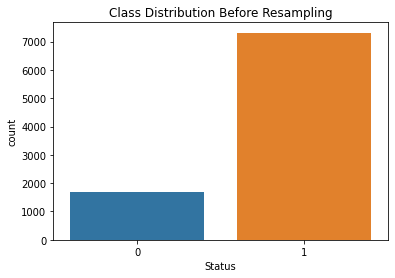

In [35]:
sns.countplot('Status', data=hire_df).set_title('Class Distribution Before Resampling')

In [36]:
X_no = X[X.Status == 0]
X_yes = X[X.Status == 1]

In [37]:
print(len(X_no),len(X_yes))

1682 7316


In [38]:
X_no_upsampled = X_no.sample(n=len(X_yes), replace=True, random_state=42)
print(len(X_no_upsampled))

7316


In [39]:
X_upsampled = X_yes.append(X_no_upsampled).reset_index(drop=True)

c:\users\nikhil kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution After Resampling')

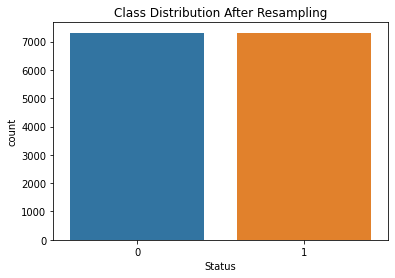

In [40]:
sns.countplot('Status', data=X_upsampled).set_title('Class Distribution After Resampling')

# ML Model

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = X_upsampled.drop(['Status'], axis=1) #features (independent variables)
y = X_upsampled['Status'] #target (dependent variable)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#### Using Random Forest 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [45]:
clf_forest = RandomForestClassifier(n_estimators=150, max_depth=20)

In [46]:
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
pred = clf_forest.predict(X_train)

In [48]:
accuracy_score(y_train, pred)

0.9892353695002136

In [49]:
confusion_matrix(y_train, pred)

array([[5841,    6],
       [ 120, 5738]], dtype=int64)

In [50]:
pred_test = clf_forest.predict(X_test)

In [51]:
accuracy_score(y_test, pred_test)

0.9169798428425009

# #### We got an average accuracy of 95.5% which is pretty decent and should be enough for the recruiters to understand the chances of candidates joining the organization.
